<a href="https://colab.research.google.com/github/Akshaay23/Machine_Learning_Projects_/blob/main/Wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0:class 0 - cultivar 0

1:class 1 - cultivar 1

2:class 2- cultivar 2

Cultivars refer to varieties that have been cultivated for specific charasticteries suited to produce wine. Each cultiver produceed wines with distinct favors,aromas and other qualityes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
wine= load_wine()

In [ ]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
X= pd.DataFrame(wine.data,columns=wine.feature_names)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X.shape

(178, 13)

In [ ]:
Y=pd.DataFrame(wine.target, columns=['target'])

In [ ]:
print(Y)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
173       2
174       2
175       2
176       2
177       2

[178 rows x 1 columns]


In [ ]:
Y['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
X = pd.concat([X,Y],axis=1)

<Axes: >

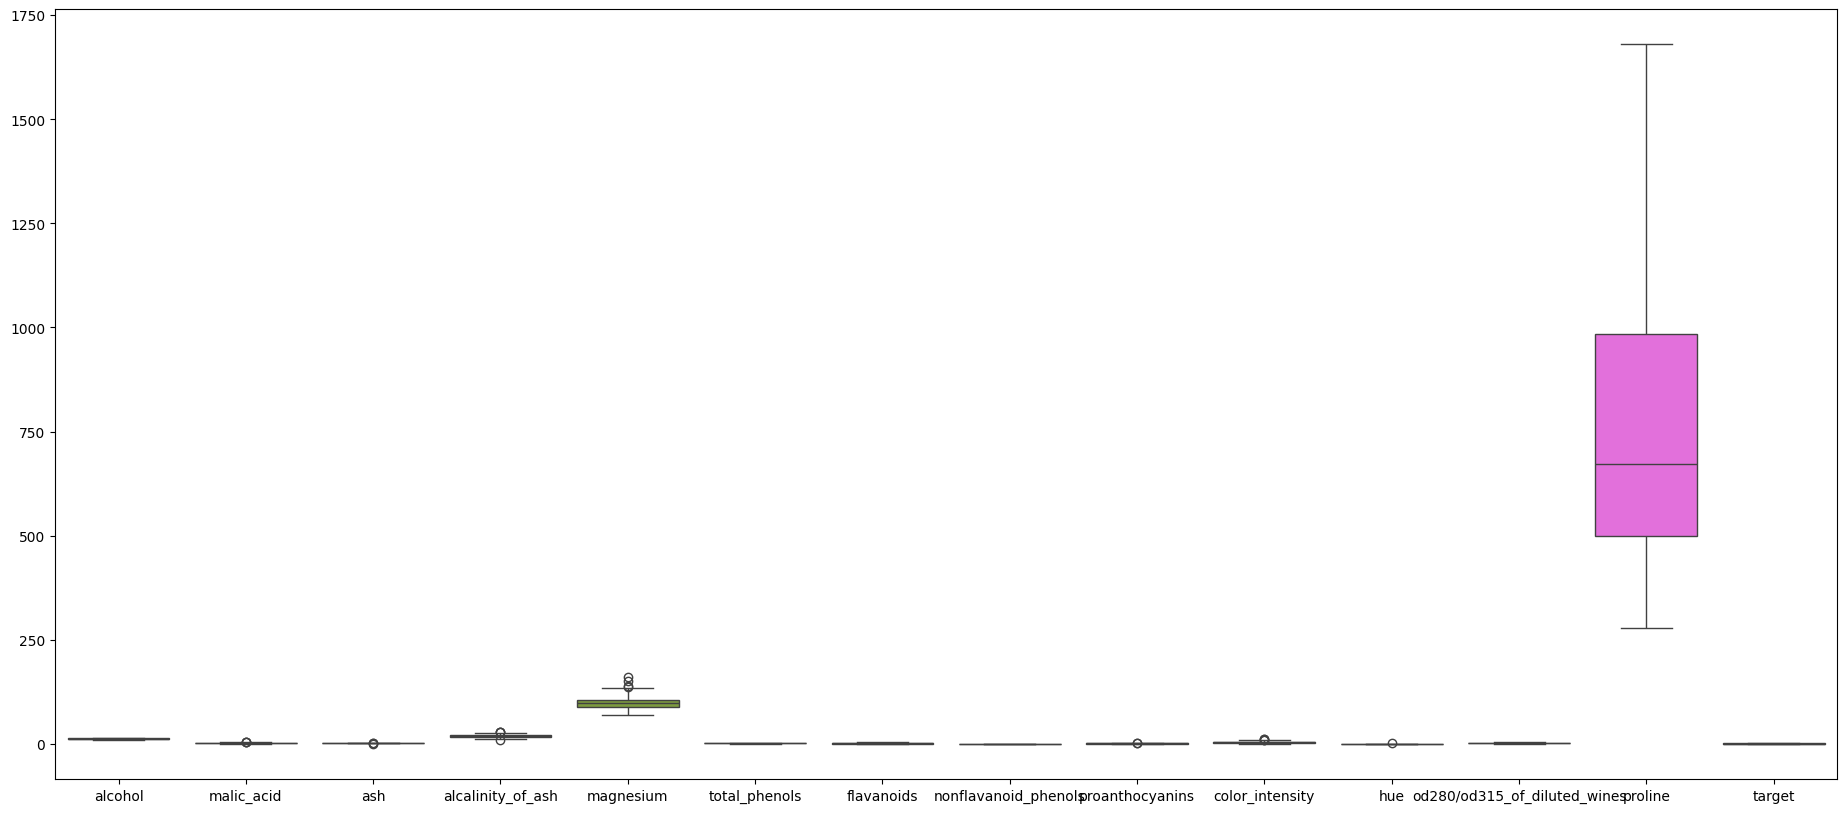

In [ ]:
# check the outlier
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=X)

In [ ]:
Q1= np.percentile(X['malic_acid'],25, interpolation='midpoint')
Q3= np.percentile(X['malic_acid'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

In [ ]:
lower_bound,upper_bound

(-0.585, 5.255)

In [ ]:
X=X[(X['malic_acid'] < upper_bound) & (X['malic_acid'] > lower_bound)]

In [ ]:
X.shape

(175, 14)

In [ ]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
Q1= np.percentile(X['ash'],25, interpolation='midpoint')
Q3= np.percentile(X['ash'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

X=X[(X['ash'] < upper_bound) & (X['ash'] > lower_bound)]

In [ ]:
X.shape

(172, 14)

In [ ]:
Q1= np.percentile(X['alcalinity_of_ash'],25, interpolation='midpoint')
Q3= np.percentile(X['alcalinity_of_ash'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

X=X[(X['alcalinity_of_ash'] < upper_bound) & (X['alcalinity_of_ash'] > lower_bound)]
X.shape

(170, 14)

In [ ]:
Q1= np.percentile(X['magnesium'],25, interpolation='midpoint')
Q3= np.percentile(X['magnesium'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

X=X[(X['magnesium'] < upper_bound) & (X['magnesium'] > lower_bound)]
X.shape

(167, 14)

In [ ]:
Q1= np.percentile(X['proanthocyanins'],25, interpolation='midpoint')
Q3= np.percentile(X['proanthocyanins'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

X=X[(X['proanthocyanins'] < upper_bound) & (X['proanthocyanins'] > lower_bound)]
X.shape

(165, 14)

In [ ]:
Q1= np.percentile(X['color_intensity'],25, interpolation='midpoint')
Q3= np.percentile(X['color_intensity'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

X=X[(X['color_intensity'] < upper_bound) & (X['proanthocyanins'] > lower_bound)]
X.shape

(162, 14)

In [ ]:
Q1= np.percentile(X['hue'],25, interpolation='midpoint')
Q3= np.percentile(X['hue'],75, interpolation='midpoint')
IQR= Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

X=X[(X['hue'] < upper_bound) & (X['hue'] > lower_bound)]
X.shape

(161, 14)

<Axes: >

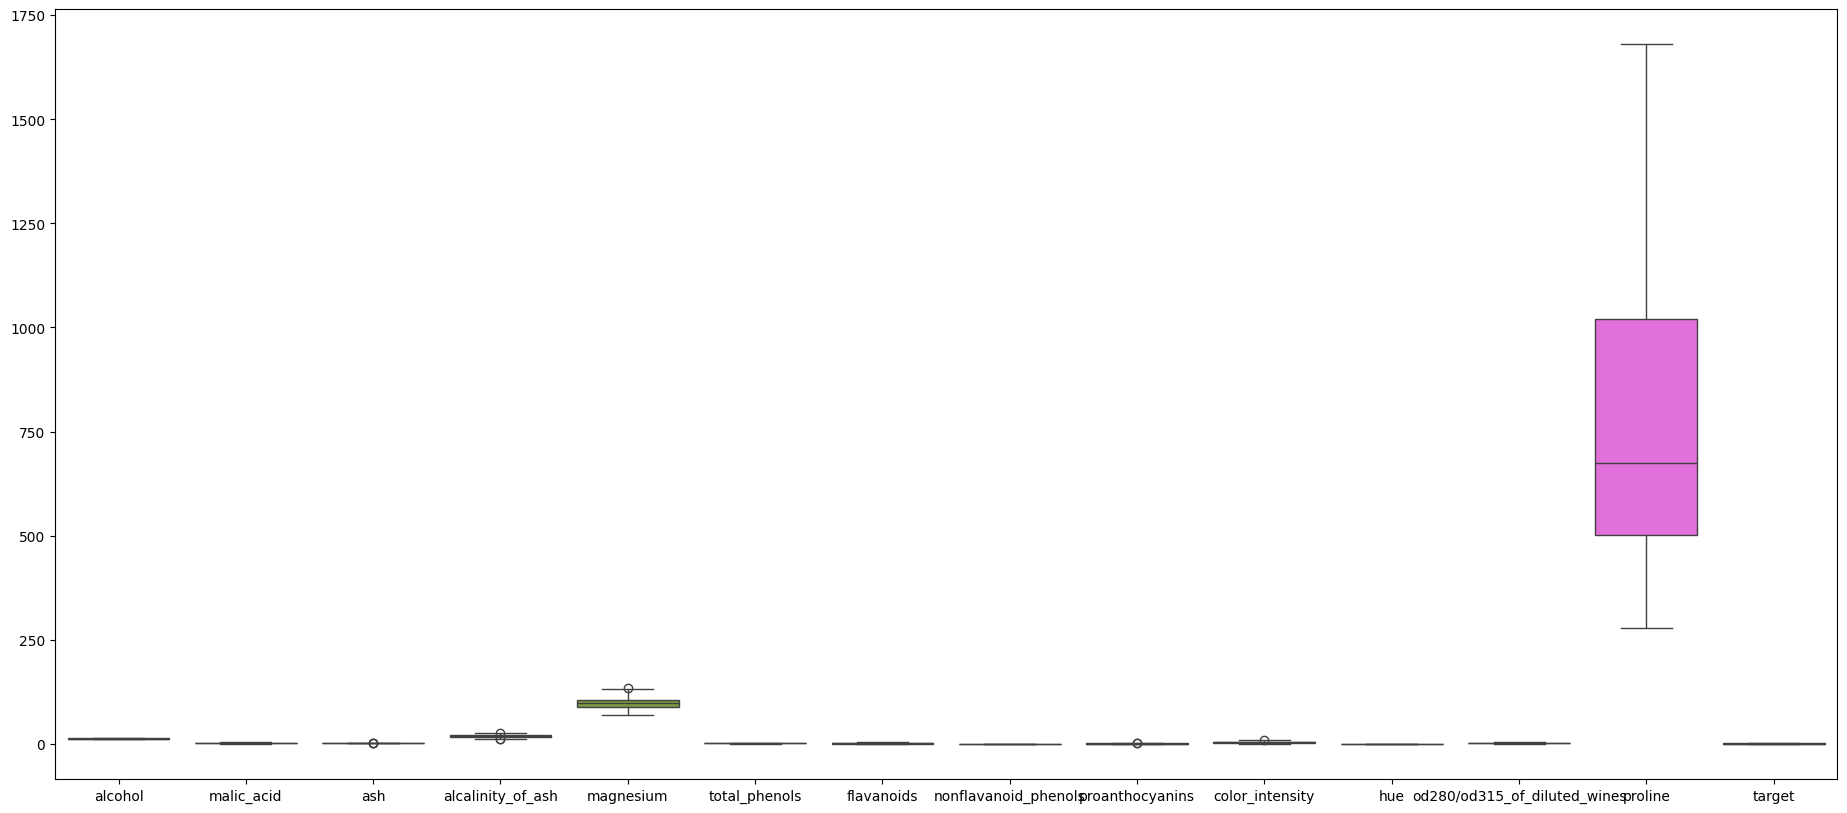

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=X)

In [ ]:
X.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876,0.913043
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297,0.785743
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000,0.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000,1.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000,2.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000,2.000000


In [ ]:
inp=X.drop('target',axis=1)
y=X['target']

In [ ]:
scaler= MinMaxScaler()
inp[:] = scaler.fit_transform(inp)

In [ ]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876,0.913043
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297,0.785743
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000,0.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000,1.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000,2.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000,2.000000


In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(inp,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((128, 13), (33, 13))

In [ ]:
def validation(estimator, inp,tar):
  return cross_val_score(estimator,inp,tar).mean() *100

In [ ]:
validation(LogisticRegression(), X_train,Y_train)

99.23076923076923

In [ ]:
validation(RandomForestClassifier(), X_train,Y_train)

97.63076923076923

In [ ]:
validation(SVC(), X_train,Y_train)

97.66153846153847

In [ ]:
model= LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
Y_test[:5]

,target
113,1
117,1
156,2
57,0
101,1


In [ ]:
pred[:5]

array([1, 1, 2, 0, 1])

In [ ]:
print(f'model accuracy is: {accuracy_score(Y_test,pred) * 100 }')

model accuracy is: 100.0


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



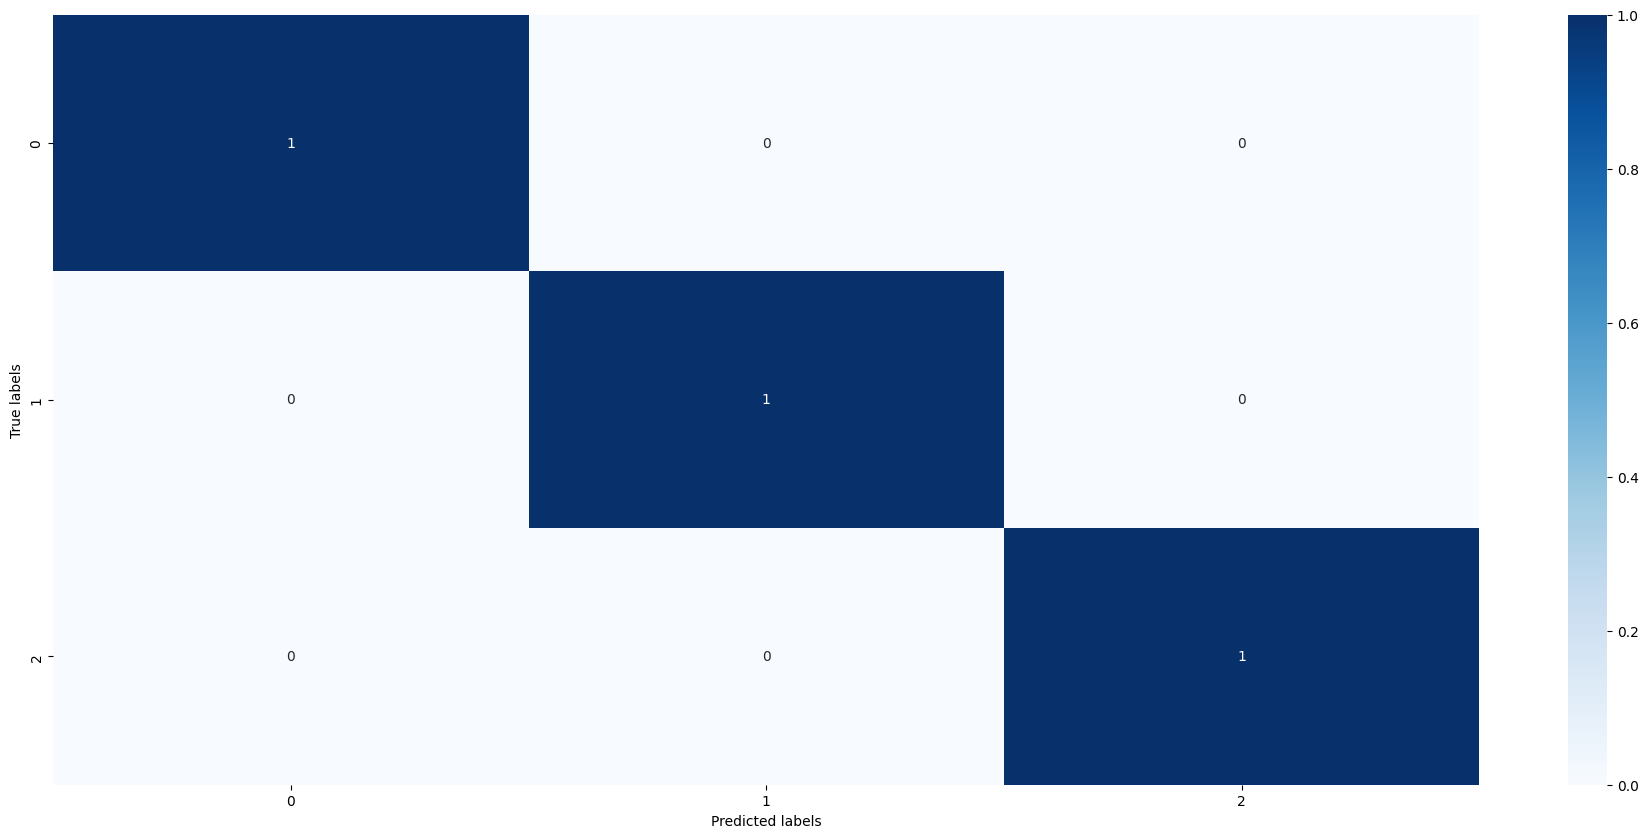

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
cf = confusion_matrix(Y_test,pred, normalize='true')
sns.heatmap(cf, annot=True , cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()